# 오버워치 2 점수판 분석 AI

In [1]:
import os
import pandas as pd

datapath = os.path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
draw = pd.read_csv(datapath + 'draw.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)


def prepare_scoreboard(defeat, draw, victory):
    scoreboard = pd.concat([defeat, draw, victory])
    scoreboard.set_index(pd.Index((i, j) for i in range(len(scoreboard) // 10) for j in range(10)), inplace=True)
    return scoreboard


scoreboard = prepare_scoreboard(defeat, draw, victory)
scoreboard

E   A   D    DMG      H    MIT    GAME
0   0   7   3   6   5933   1068   6199  DEFEAT
    1   7   0  10   3601    747      0  DEFEAT
    2   9   1   6   4352      0      0  DEFEAT
    3   7   7   2   2332   6325      0  DEFEAT
    4   6   4   2   3410   5979    606  DEFEAT
...    ..  ..  ..    ...    ...    ...     ...
168 5  19   3  11  12775      0  24912  DEFEAT
    6  22   1  10  10100   1911      0  DEFEAT
    7  16   2  10  11887      0      0  DEFEAT
    8   5  12  11   2391   9817    154  DEFEAT
    9  12  13  10   3532  13911      0  DEFEAT

[1690 rows x 7 columns]

In [2]:
scoreboard.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1690 entries, (0, 0) to (168, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       1690 non-null   int64 
 1   A       1690 non-null   int64 
 2   D       1690 non-null   int64 
 3   DMG     1690 non-null   int64 
 4   H       1690 non-null   int64 
 5   MIT     1690 non-null   int64 
 6   GAME    1690 non-null   object
dtypes: int64(6), object(1)
memory usage: 103.2+ KB


In [3]:
scoreboard['GAME'].value_counts()

GAME
DEFEAT     820
VICTORY    820
DRAW        50
Name: count, dtype: int64

In [4]:
tank = scoreboard[::10]
damage = pd.concat([scoreboard[1::10], scoreboard[2::10]])
support = pd.concat([scoreboard[3::10], scoreboard[4::10]])

In [5]:
tank.describe()

,E,A,D,DMG,H,MIT
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,21.201183,5.532544,5.739645,9773.579882,247.976331,11017.775148
std,10.901933,4.625287,4.046268,4328.161863,708.669351,6793.814371
min,0.000000,0.000000,0.000000,915.000000,0.000000,350.000000
25%,14.000000,2.000000,3.000000,6671.000000,0.000000,6199.000000
50%,21.000000,4.000000,5.000000,10182.000000,0.000000,9594.000000
75%,30.000000,8.000000,8.000000,12428.000000,0.000000,14251.000000
max,48.000000,24.000000,19.000000,21439.000000,4541.000000,41092.000000


In [6]:
damage.describe()

,E,A,D,DMG,H,MIT
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,19.713018,1.890533,7.000000,8837.928994,322.334320,460.798817
std,10.738207,2.717647,4.167844,4560.530794,548.853645,961.576843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,4.000000,5628.000000,0.000000,0.000000
50%,19.000000,1.000000,7.000000,8442.500000,0.000000,0.000000
75%,27.000000,3.000000,9.000000,11281.250000,426.500000,437.500000
max,56.000000,17.000000,21.000000,29354.000000,2673.000000,6070.000000


In [7]:
support.describe()

,E,A,D,DMG,H,MIT
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,9.615385,17.094675,5.671598,2907.127219,9756.502959,437.106509
std,7.408793,9.627016,3.633241,2216.676101,4690.567198,775.562413
min,0.000000,0.000000,0.000000,0.000000,341.000000,0.000000
25%,4.000000,11.000000,3.000000,1270.750000,6538.750000,0.000000
50%,9.000000,17.000000,5.000000,2625.000000,9007.000000,116.000000
75%,14.000000,23.000000,8.000000,3997.000000,12384.000000,556.750000
max,52.000000,48.000000,16.000000,16254.000000,27756.000000,5442.000000


그림 저장: tank_hist


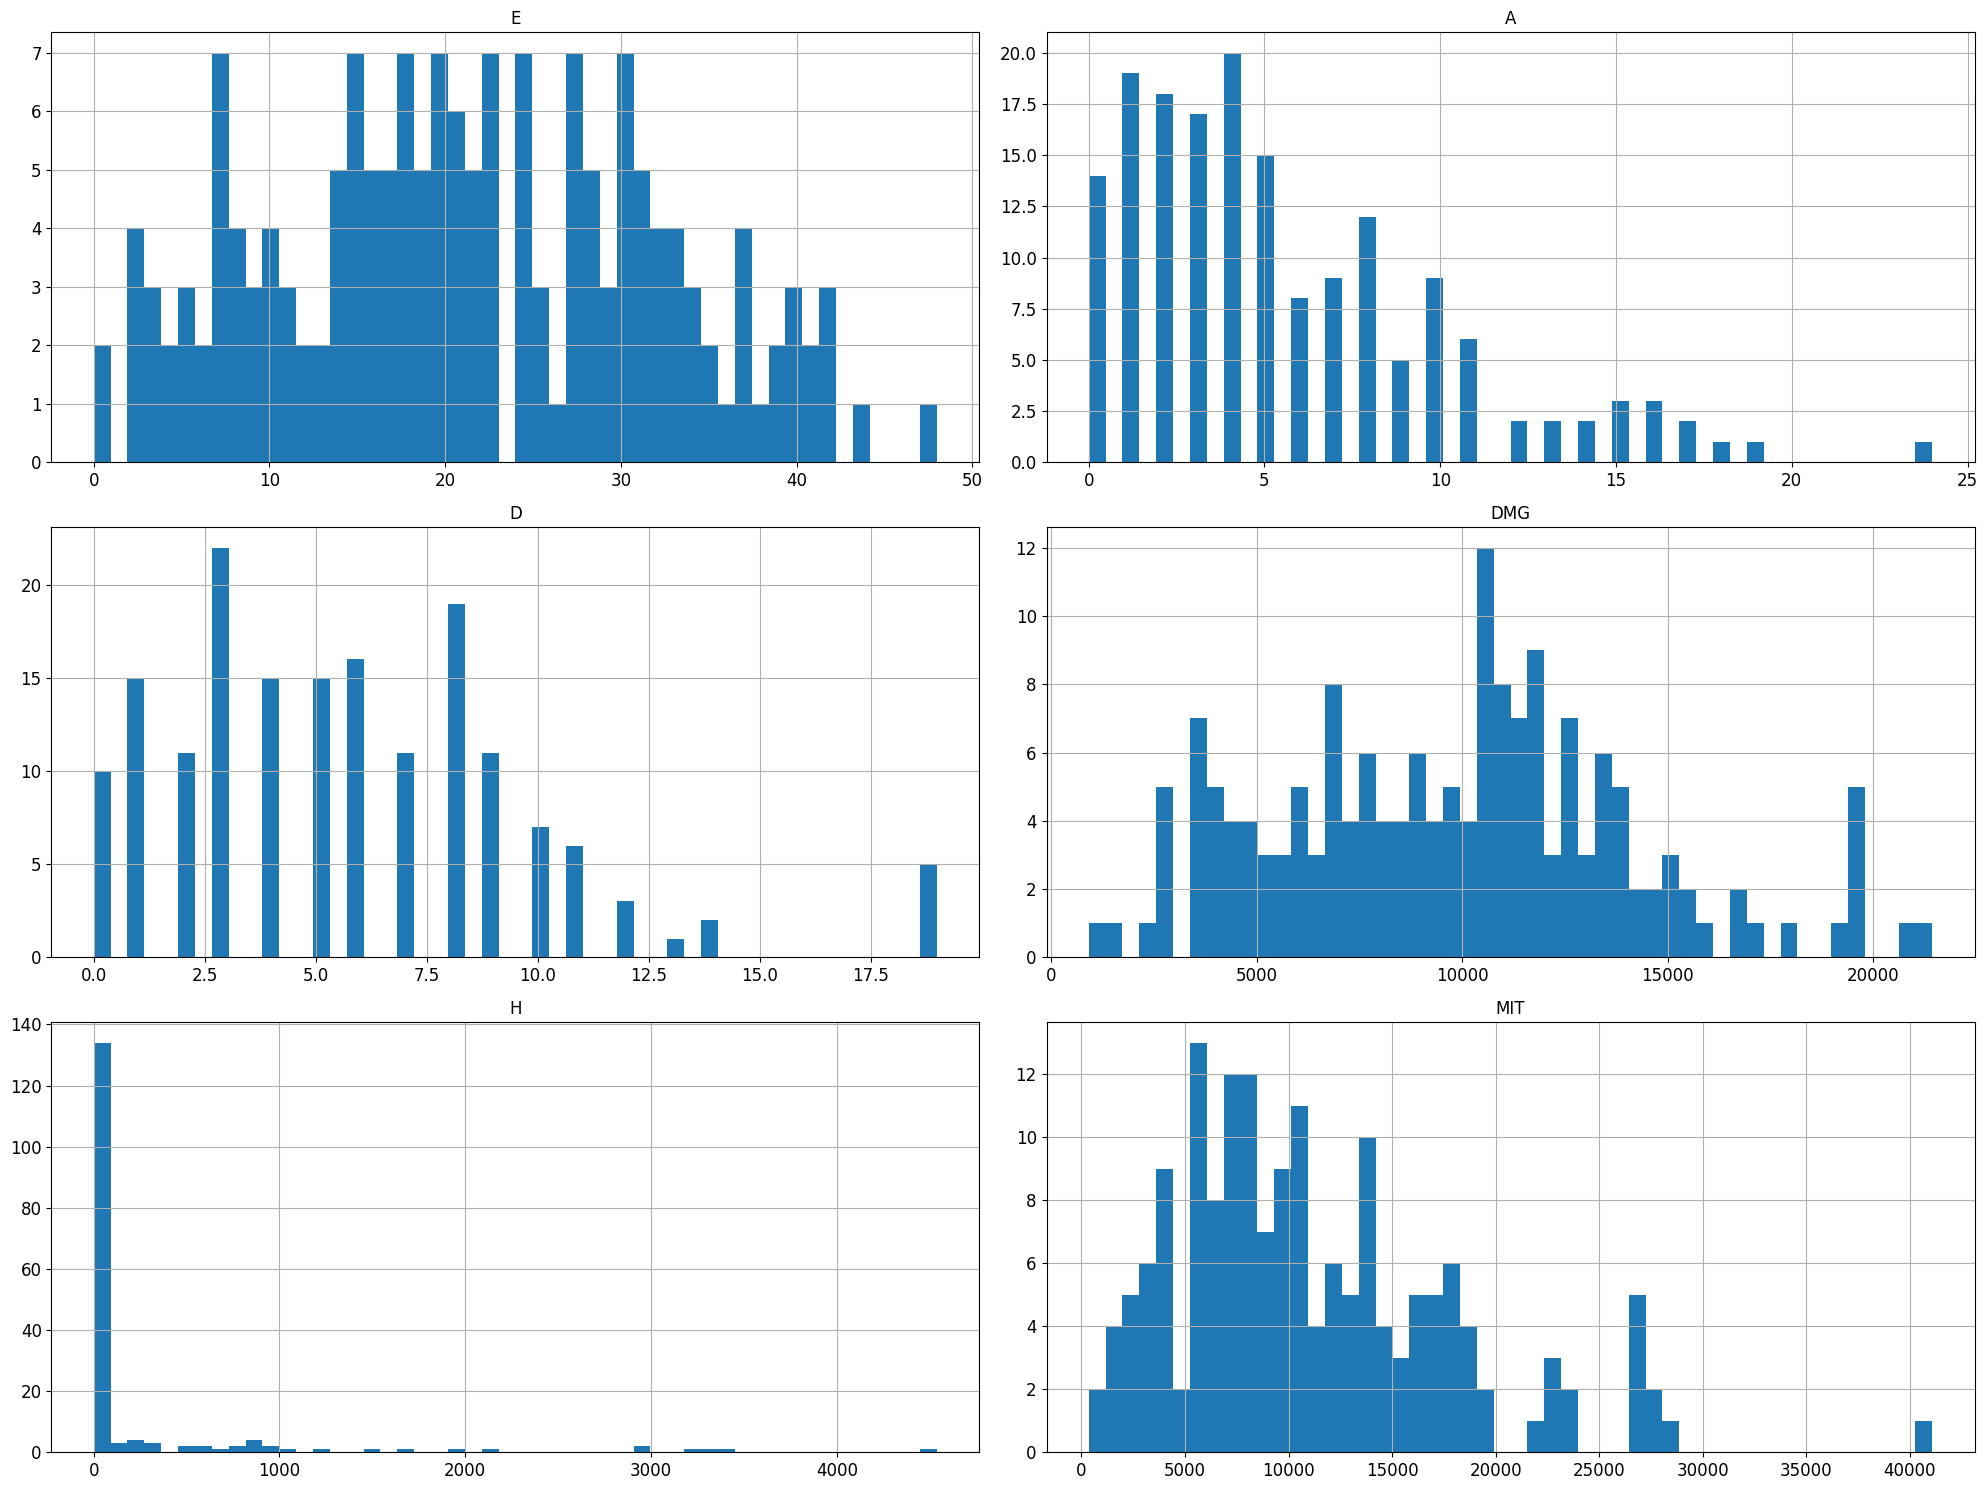

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

IMAGES_PATH = os.path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)


tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장: damage_hist


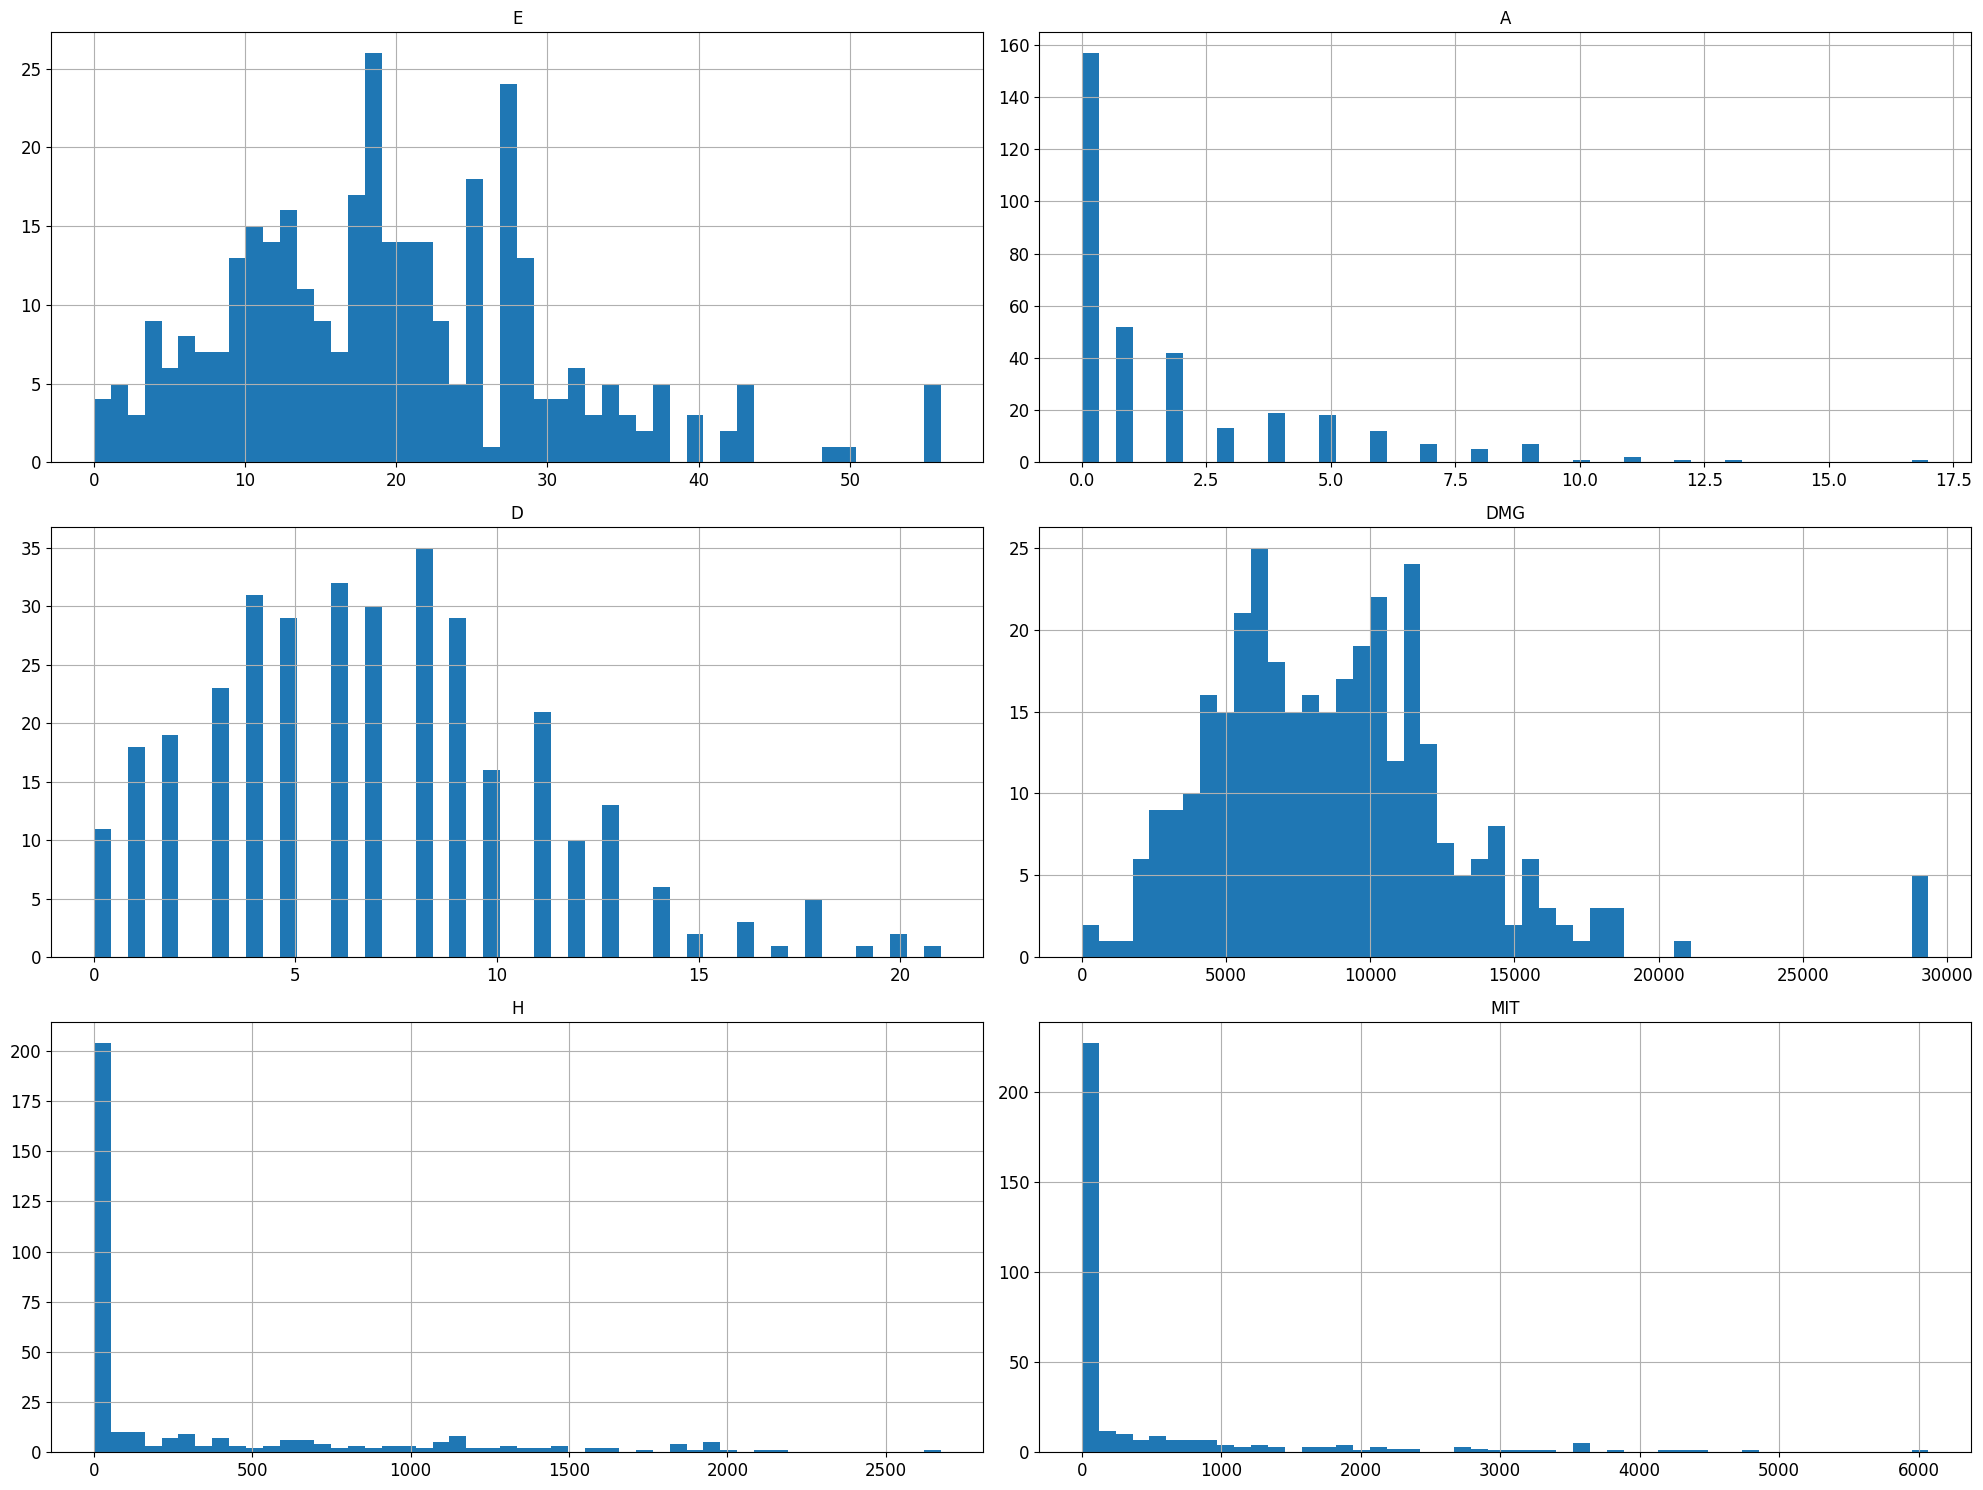

In [9]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장: support_hist


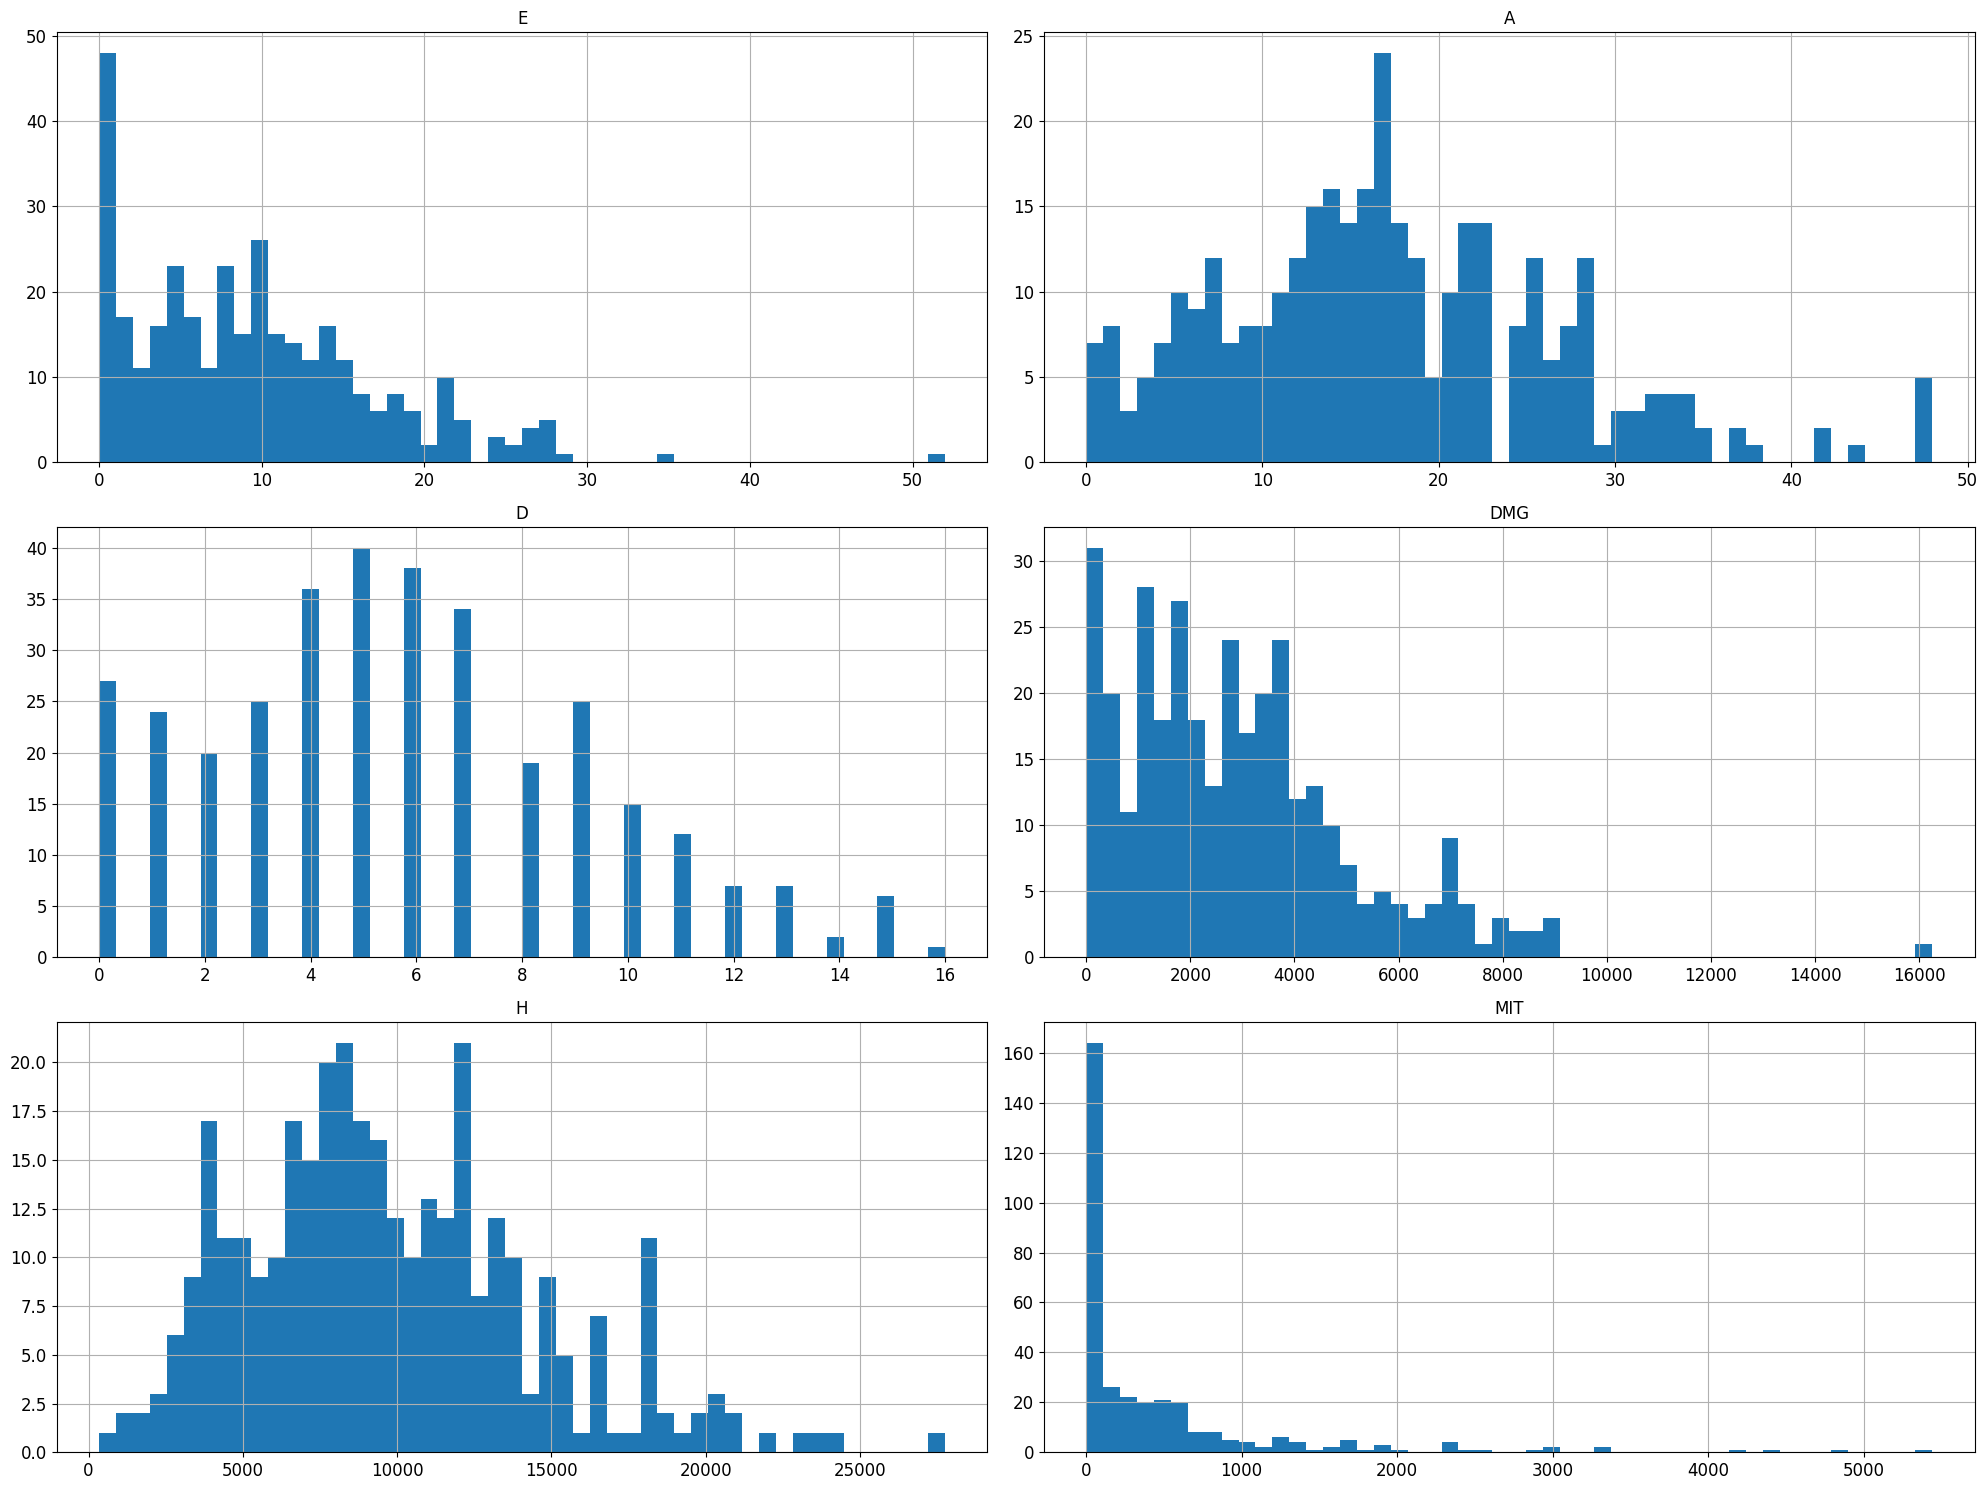

In [10]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [11]:
import numpy as np

scoreboard = scoreboard.loc[np.random.default_rng().permutation(len(scoreboard) // 10)]

In [12]:
e = scoreboard['E'].copy()
d = scoreboard['D'].copy()
e.loc[e == 0] = 0.5
d.loc[d == 0] = 0.5
e_per_d = e / d

In [13]:
e_per_d[::10].describe()  # TANK

count    169.000000
mean       7.503939
std        9.327641
min        0.083333
25%        1.875000
50%        3.800000
75%        9.000000
max       46.000000
dtype: float64

In [14]:
pd.concat([e_per_d[1::10], e_per_d[2::10]]).describe()  # DAMAGE

count    338.000000
mean       4.334829
std        4.764395
min        0.125000
25%        1.714286
50%        2.900000
75%        4.777778
max       30.000000
dtype: float64

In [15]:
pd.concat([e_per_d[3::10], e_per_d[4::10]]).describe()  # SUPPORT

count    338.000000
mean       3.129440
std        5.128115
min        0.045455
25%        0.750000
50%        1.612500
75%        3.000000
max       42.000000
dtype: float64

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

scoreboard_num = scoreboard.drop('GAME', axis=1)
e_ix, d_ix = [scoreboard_num.columns.get_loc(c) for c in ('E', 'D')]


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.to_numpy(np.float64)
        e = X[:, e_ix]
        d = X[:, d_ix]
        e[e == 0] = 0.5
        d[d == 0] = 0.5
        e_per_d = e / d
        return np.c_[X, e_per_d]


attr_adder = CombinedAttributesAdder()
scoreboard_extra_attribs = attr_adder.transform(scoreboard_num)
scoreboard_extra_attribs = pd.DataFrame(
    scoreboard_extra_attribs, scoreboard_num.index, list(scoreboard_num) + ['E_per_D']
)
scoreboard_extra_attribs

E     A     D      DMG        H      MIT   E_per_D
34 0  15.0   5.0   8.0   8346.0      0.0   7000.0  1.875000
   1  13.0   1.0   5.0   6407.0      0.0      0.0  2.600000
   2   6.0   0.0   6.0   5328.0    720.0    566.0  1.000000
   3   4.0  13.0   6.0    774.0   7507.0      0.0  0.666667
   4   4.0  10.0   7.0   1556.0   4288.0    523.0  0.571429
...    ...   ...   ...      ...      ...      ...       ...
81 5  55.0  14.0  13.0  24408.0   3060.0  14077.0  4.230769
   6  47.0   6.0  18.0  18533.0   2069.0    360.0  2.611111
   7  41.0   0.0  16.0  16157.0   2052.0      0.0  2.562500
   8  17.0  36.0  12.0   3040.0  18193.0    488.0  1.416667
   9  14.0  41.0  13.0   3417.0  21117.0      0.0  1.076923

[1690 rows x 7 columns]

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('attribs_adder', CombinedAttributesAdder()), ('std_scaler', StandardScaler())])
scoreboard_num_tr = num_pipeline.fit_transform(scoreboard_num)
scoreboard_num_tr

array([[ 0.04828835, -0.31379507,  0.34864207, ..., -0.75015865,
         0.92945894, -0.32449136],
       [-0.14238293, -0.75738659, -0.41556687, ..., -0.75015865,
        -0.49484993, -0.1840087 ],
       [-0.80973238, -0.86828447, -0.16083056, ..., -0.6172376 ,
        -0.37968439, -0.4940394 ],
       ...,
       [ 2.5270149 , -0.86828447,  2.38653258, ..., -0.37133366,
        -0.49484993, -0.19127504],
       [ 0.23895962,  3.12403923,  1.36758732, ...,  2.60849783,
        -0.39555526, -0.41330224],
       [-0.04704729,  3.67852863,  1.62232364, ...,  3.14830499,
        -0.49484993, -0.47913407]])

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

full_pipeline = ColumnTransformer(
    [('num', num_pipeline, scoreboard_num.columns), ('cat', OrdinalEncoder(), ['GAME'])]
)
scoreboard_prepared = full_pipeline.fit_transform(scoreboard)
scoreboard_prepared

array([[ 0.04828835, -0.31379507,  0.34864207, ...,  0.92945894,
        -0.32449136,  0.        ],
       [-0.14238293, -0.75738659, -0.41556687, ..., -0.49484993,
        -0.1840087 ,  0.        ],
       [-0.80973238, -0.86828447, -0.16083056, ..., -0.37968439,
        -0.4940394 ,  0.        ],
       ...,
       [ 2.5270149 , -0.86828447,  2.38653258, ..., -0.49484993,
        -0.19127504,  1.        ],
       [ 0.23895962,  3.12403923,  1.36758732, ..., -0.39555526,
        -0.41330224,  1.        ],
       [-0.04704729,  3.67852863,  1.62232364, ..., -0.49484993,
        -0.47913407,  1.        ]])

In [19]:
scoreboard_prepared.shape

(1690, 8)

In [20]:
X = scoreboard_prepared[:, :-1].reshape(-1, 70)
X

array([[ 0.04828835, -0.31379507,  0.34864207, ...,  0.27924104,
        -0.49484993, -0.15494332],
       [ 2.33634362,  0.01889857, -0.16083056, ...,  2.38400895,
        -0.35262252, -0.63936628],
       [ 0.7156378 ,  0.35159222, -0.9250395 , ..., -0.75015865,
        -0.49484993, -0.4940394 ],
       ...,
       [ 0.52496653, -0.75738659,  1.36758732, ...,  1.49694555,
        -0.3654413 , -0.22276254],
       [ 2.43167926, -0.42469295,  0.34864207, ...,  1.6533124 ,
        -0.32088078, -0.37479682],
       [ 1.47832289, -0.31379507,  3.15074152, ...,  3.14830499,
        -0.49484993, -0.47913407]])

In [21]:
X.shape

(169, 70)

In [22]:
y = scoreboard_prepared[::10, -1]
y

array([0., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 2., 2., 2., 0., 0., 2.,
       2., 0., 0., 2., 0., 2., 2., 2., 0., 2., 0., 2., 0., 0., 2., 0., 0.,
       2., 0., 2., 2., 0., 0., 2., 0., 2., 0., 0., 2., 2., 0., 2., 0., 0.,
       2., 2., 0., 0., 0., 2., 1., 1., 2., 0., 2., 2., 0., 2., 2., 0., 2.,
       0., 1., 0., 2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 2., 2., 0., 0.,
       0., 0., 2., 2., 0., 0., 2., 0., 0., 2., 1., 2., 2., 2., 2., 2., 0.,
       2., 2., 2., 2., 2., 2., 0., 0., 2., 0., 2., 2., 2., 0., 2., 0., 0.,
       0., 0., 2., 0., 0., 2., 2., 2., 0., 0., 2., 2., 0., 0., 0., 2., 2.,
       2., 2., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2.,
       2., 2., 2., 0., 0., 0., 2., 2., 0., 0., 0., 0., 2., 0., 2., 1.])

In [23]:
y.shape

(169,)

In [24]:
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.tree import *
from sklearn.model_selection import cross_val_score

models = {
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(n_jobs=-1),
    'ExtraTreesClassifier': ExtraTreesClassifier(n_jobs=-1),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
    'Perceptron': Perceptron(n_jobs=-1),
    'RidgeClassifier': RidgeClassifier(),
    'SGDClassifier': SGDClassifier(n_jobs=-1),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(max_iter=200, n_jobs=-1),
    'RadiusNeighborsClassifier': RadiusNeighborsClassifier(radius=12.0, n_jobs=-1),  # 8 16
    'NearestCentroid': NearestCentroid(),
    'KNeighborsClassifier': KNeighborsClassifier(n_jobs=-1),
    'NuSVC': NuSVC(nu=0.0625),
    'SVC': SVC(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}
scores = {}
for k, v in models.items():
    scores[k] = cross_val_score(v, X, y, n_jobs=-1).mean()
sorted_ = sorted(scores.items(), key=lambda item: item[1], reverse=True)
sorted_

[('GradientBoostingClassifier', 0.9049910873440284),
 ('ExtraTreesClassifier', 0.881283422459893),
 ('RandomForestClassifier', 0.8754010695187165),
 ('HistGradientBoostingClassifier', 0.8693404634581106),
 ('LogisticRegression', 0.8631016042780748),
 ('SVC', 0.8575757575757577),
 ('BaggingClassifier', 0.857397504456328),
 ('NuSVC', 0.8511586452762924),
 ('AdaBoostClassifier', 0.8456327985739751),
 ('PassiveAggressiveClassifier', 0.8452762923351159),
 ('KNeighborsClassifier', 0.8399286987522281),
 ('NearestCentroid', 0.8279857397504455),
 ('SGDClassifier', 0.8274509803921569),
 ('Perceptron', 0.8274509803921568),
 ('DecisionTreeClassifier', 0.8160427807486631),
 ('RidgeClassifier', 0.7980392156862745),
 ('ExtraTreeClassifier', 0.768270944741533),
 ('RadiusNeighborsClassifier', 0.5089126559714795)]

In [25]:
model = models[sorted_[0][0]]
model

GradientBoostingClassifier()

In [26]:
from sklearn.model_selection import cross_val_predict

transform = full_pipeline.named_transformers_.cat.inverse_transform
for i, (y1, y2) in enumerate(
        zip(transform(y.reshape(-1, 1)), transform(cross_val_predict(model, X, y, n_jobs=-1).reshape(-1, 1)))
):
    if y1 != y2:
        print(f'{i} {y1[0]} {y2[0]}')

20 VICTORY DEFEAT
28 VICTORY DEFEAT
39 DEFEAT VICTORY
55 DEFEAT VICTORY
56 VICTORY DEFEAT
63 DEFEAT VICTORY
70 DEFEAT VICTORY
86 DEFEAT VICTORY
105 VICTORY DEFEAT
118 DEFEAT VICTORY
121 VICTORY DEFEAT
137 VICTORY DEFEAT
144 DEFEAT VICTORY
145 VICTORY DEFEAT
147 DEFEAT VICTORY
155 VICTORY DEFEAT


In [100]:
i = 20
i_ = i * 10
data = scoreboard[i_:i_ + 10]
print(data.index[0][0] - len(defeat) // 10 - len(draw) // 10 + 1)
data

64


E  A  D   DMG     H   MIT     GAME
145 0  6  1  1  4935     0  1896  VICTORY
    1  4  0  1  2540     0     0  VICTORY
    2  5  0  4  2127     0  1440  VICTORY
    3  0  2  1   225  2644    58  VICTORY
    4  0  4  2     0  3927     0  VICTORY
    5  6  3  1  3472     0  1285   DEFEAT
    6  7  0  2  3210     0     0   DEFEAT
    7  0  0  0     0     0     0   DEFEAT
    8  1  3  2   356  2152    64   DEFEAT
    9  3  5  0  1283  2749   249   DEFEAT

In [125]:
model = models[sorted_[0][0]]
model

GradientBoostingClassifier()

In [126]:
model = model.fit(X, y)

In [127]:
model.score(X, y)

1.0

In [128]:
importances = model.feature_importances_.reshape(-1, 7)

In [129]:
feature = '처치', '도움', '죽음', '피해', '치유', '경감', '목숨당 처치'
print('**특성 중요도**')
for s, f in sorted(zip(importances.sum(0), feature), reverse=True):
    print(f'{f}: {s * 100:.1f}%')

**특성 중요도**
목숨당 처치: 69.6%
경감: 6.5%
치유: 6.4%
죽음: 6.4%
피해: 6.2%
처치: 4.0%
도움: 0.8%


In [130]:
tank = importances[[0, 5]]
damage = importances[[1, 2, 6, 7]]
support = importances[[3, 4, 8, 9]]

In [131]:
feature = '돌격', '공격', '지원'
sum_ = tank.sum(), damage.sum(), support.sum()
print('**역할 중요도**')
for s, f in sorted(zip(sum_, feature), reverse=True):
    print(f'{f}: {s * 100:.1f}%')

**역할 중요도**
돌격: 61.9%
공격: 22.9%
지원: 15.2%


In [132]:
feature = '돌격', '공격', '지원'
sum_ = tank.sum(), damage.sum() / 2, support.sum() / 2
print('**1인 역할 중요도**')
for s, f in sorted(zip(sum_, feature), reverse=True):
    print(f'{f}: {s * 100:.0f}%')

**1인 역할 중요도**
돌격: 62%
공격: 11%
지원: 8%


In [133]:
feature = '처치', '도움', '죽음', '피해', '치유', '경감', '목숨당 처치'

print('**돌격 특성 중요도**')
for s, f in sorted(zip(tank.sum(0), feature), reverse=True):
    print(f'{f}: {s * 100:.1f}%')

print()

print('**공격 특성 중요도**')
for s, f in sorted(zip(damage.sum(0), feature), reverse=True):
    print(f'{f}: {s * 100:.1f}%')

print()

print('**지원 특성 중요도**')
for s, f in sorted(zip(support.sum(0), feature), reverse=True):
    print(f'{f}: {s * 100:.0f}%')

**돌격 특성 중요도**
목숨당 처치: 57.3%
죽음: 2.2%
경감: 0.7%
처치: 0.6%
치유: 0.6%
피해: 0.5%
도움: 0.0%

**공격 특성 중요도**
목숨당 처치: 9.0%
치유: 4.1%
피해: 3.4%
처치: 3.1%
죽음: 1.8%
경감: 1.5%
도움: 0.1%

**지원 특성 중요도**
경감: 4%
목숨당 처치: 3%
죽음: 2%
피해: 2%
치유: 2%
도움: 1%
처치: 0%


In [134]:
print('**1인 돌격 특성 중요도**')
for s, f in sorted(zip(tank.sum(0), feature), reverse=True):
    print(f'{f}: {s * 100:.1f}%')

print()

print('**1인 공격 특성 중요도**')
for s, f in sorted(zip(damage.sum(0) / 2, feature), reverse=True):
    print(f'{f}: {s * 100:.1f}%')

print()

print('**1인 지원 특성 중요도**')
for s, f in sorted(zip(support.sum(0) / 2, feature), reverse=True):
    print(f'{f}: {s * 100:.2f}%')

**1인 돌격 특성 중요도**
목숨당 처치: 57.3%
죽음: 2.2%
경감: 0.7%
처치: 0.6%
치유: 0.6%
피해: 0.5%
도움: 0.0%

**1인 공격 특성 중요도**
목숨당 처치: 4.5%
치유: 2.0%
피해: 1.7%
처치: 1.6%
죽음: 0.9%
경감: 0.8%
도움: 0.0%

**1인 지원 특성 중요도**
경감: 2.12%
목숨당 처치: 1.67%
죽음: 1.21%
피해: 1.20%
치유: 0.88%
도움: 0.34%
처치: 0.17%
